# The machine learning pipeline

Modeling churn means to understand what keeps the customer engaged to our product. Its analysis goal is to predict or describe the **churn rate** i.e. the rate at which customer leave or cease the subscription to a service. Its value lies in the fact that engaging new customers is often more costly than retaining existing ones. For that reason subscription business-based companies usually have proactive policies towards customer retention.

In this case study, we aim at building a machine learning based model for customer churn prediction on data from a Telecom company. Each row on the dataset represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

This case is partially inspired in Eric Chiang's analysis of churn rate. Data is available from the University of California Irvine machine learning repositories data set.

## Goal
 + Implement a full machine learning pipeline.
 + Understand the concepts of training, validation, and test.

In [21]:
import pandas as pd

dl=pd.read_csv('./files/churn_curated_numerical.csv',header=None)

In [22]:
dl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,128.0,415.0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0.0
1,107.0,415.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0.0
2,137.0,415.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0.0
3,84.0,408.0,1.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0.0
4,75.0,415.0,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0.0


In [26]:
data = dl.values

In [27]:
data.shape

(3333, 19)

In [28]:
X = data[:,:-1]
y = data[:,-1]

In [29]:
X.shape

(3333, 18)

In [30]:
import numpy as np
np.unique(y)

array([0., 1.])

In [31]:
X

array([[128.  , 415.  ,   0.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  , 415.  ,   0.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  , 415.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  , 510.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  , 510.  ,   1.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  , 415.  ,   0.  , ...,   4.  ,   3.7 ,   0.  ]])

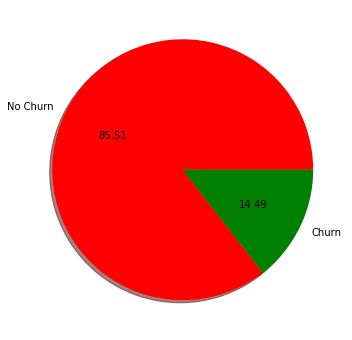

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],colors=['r','g'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

## Data

Observe data

In [33]:
import numpy as np

np.mean(X,axis=0)
print(np.var(X,axis=0))

[1.58532433e+03 1.79478761e+03 8.75182028e-02 2.00104799e-01
 1.87315130e+02 2.96580639e+03 4.02647298e+02 8.57114045e+01
 2.57112237e+03 3.96791913e+02 1.85762804e+01 2.55694661e+03
 3.82815581e+02 5.17804314e+00 7.79202952e+00 6.05575823e+00
 5.68002683e-01 1.72999748e+00]


A problem in Scikit-Learn is modeled as follows:

+ Input data is structured in Numpy arrays. The size of the array is expected to be [n_samples, n_features]:

    + *n_samples*: The number of samples ($N$): each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
  
    + *n_features*: The number of features ($d$) or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean, discrete-valued or even cathegorical.

$${\rm feature~matrix:} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
x_{31} & x_{32} & \cdots & x_{3d}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{Nd}\\
\end{matrix}
\right]$$

$${\rm label~vector:} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]$$
    

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. 

Create and fit a decision tree (you can find it in the module sklearn.tree and the name is DecisionTreeClassifier)

In [34]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

Predict the data you used for training/fiting the classifer

In [35]:
yhat = clf.predict(X)

In [36]:
yhat[0],y[0]

(0.0, 0.0)

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We need a measure of how well the classifier is performing. `yhat` is a list and our target outcome `y`is also a list. Create a measure of accuracy. </div>

In [37]:
#Your code here

One sensible way of measuring the goodness of a classifier is measuring the error rate, i.e. the number of times the classifier fails divided by the total number of elements.

$$err = \frac{1}{N}\sum \mathbb{1}_{\tilde{y}!=y}$$

where $\mathbb{1}_{\text{cond}}$ is the indicator function given a condition, $\text{cond}$, defined as 

$$\mathbb{1}_{\text{cond}}=\left \{\begin{align} 1 & \quad\text{if cond = True}\\ 0 & \quad\text{otherwise} \end{align}\right.$$
Alternatively, we can report the accuracy, defined as the rate of success

$$acc = \frac{1}{N}\sum \mathbb{1}_{\tilde{y}==y}.$$

Observe that $acc = 1-err$.

`sklearn` reports this result using the method from module `metrics`, `.accuracy_score`.

In [38]:
from sklearn import metrics

metrics.accuracy_score(y,yhat)

1.0

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this a good result?</div>

<div class = "alert alert-warning" style="border-radius:10px">  BACK TO SLIDES!!!</div>

# Knowledge representation

In [39]:
#Load data set.
from sklearn import datasets
digits = datasets.load_digits()

In [40]:
#Check the data format.
X, y = digits.data, digits.target

print (X.shape)
print (y.shape)

(1797, 64)
(1797,)


(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


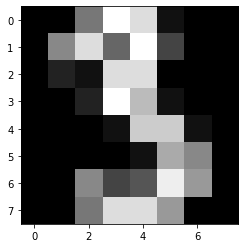

In [41]:
%matplotlib inline
# The original digit has been flattened, so we reshape it back to its original form
# Check the dimensionality of the data, e.g. the first element in the data set X[0]
print (X[0].shape)
print (X[0])

# Reshape it to 8x8 to recover the original image
print (X[0].reshape((8,8)))


# Show the image using scikit.image package
import matplotlib.pyplot as plt

plt.imshow(X[3].reshape((8,8)),cmap="gray",interpolation="nearest")


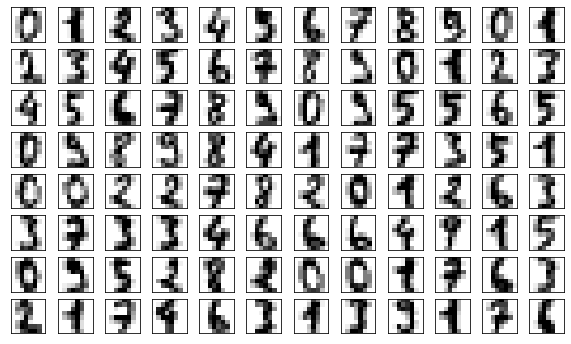

In [42]:
#Visualize some of the data.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(8, 12, subplot_kw={'xticks':[], 'yticks':[]})
for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8),
                      cmap=plt.cm.binary)
fig.set_size_inches((10,6))

<div class = "alert alert-info" style="border-radius:10px"> <b>DISCUSS THE FOLLOWING KNOWLEDGE REPRESENTATION:</b> 
<p>    
(A) We are asked to develop a product for automatic translation of text from a document. 
<p>
(B) We are asked to develop a product similar to Shazzam(tm). This is, recognize the name of a song given a small sample of the music.*
<p>
Discuss and describe a posible feature vector for this problem with your partner.
</div>

### More intuition about the data: The feature space

Data is usually gathered as raw values. In the case of the digits dataset the gray values of the image. However, we can use domain knowledge we may consider important in order to discriminate the different classes. Take for instance two very simple derived features: horizontal, vertical symmetry and area. 

C:\Users\blair\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


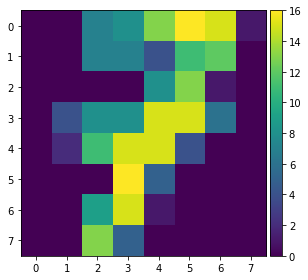

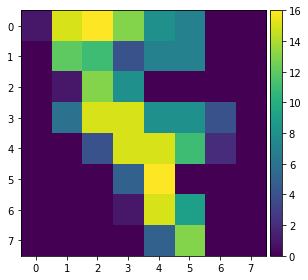

[[2808.  294. 2886.]
 [3670.  313. 3888.]
 [2810.  344. 3512.]
 ...
 [4776.  374. 4734.]
 [3656.  344. 3248.]
 [4422.  392. 4220.]]
(1797, 3)


In [43]:
from skimage import io as io

tmp = X[7].reshape((8,8))    
sym = tmp*tmp[:,::-1]
io.imshow(tmp)
io.show()
io.imshow(tmp[:,::-1])
io.show()

import numpy as np
Xnew = np.zeros((y.shape[0],3))
for i in range(y.shape[0]):
    area = sum(X[i])
    tmp = X[i].reshape((8,8))    
    symH = tmp*tmp[:,::-1]
    symV = tmp*tmp[::-1,:]
    
    Xnew[i,:]=[sum(symH.flatten()), area, sum(symV.flatten())]

print (Xnew)
print (Xnew.shape)

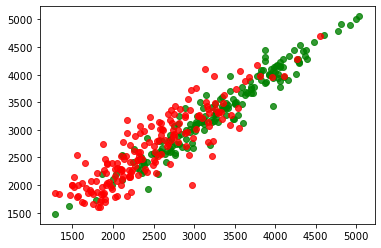

In [44]:
import matplotlib.pyplot as plt
idxA = y==0
idxB = y==6

feature1 = 0
feature2 = 2

plt.figure()
plt.scatter(Xnew[idxA, feature1], Xnew[idxA,feature2], c='green',alpha=0.8)
plt.scatter(Xnew[idxB, feature1], Xnew[idxB,feature2], c='red',alpha=0.8)
plt.show()

<div class = "alert alert-success"> **Exercise** Change feature1 and feature2 axis $\in \{0,1,2\}$ and select the most suitable view for classification purposes. Why did you select that view?
</div>

The process of using knowledge domain information in order to create discriminant features is called <span style="color:red">feature extraction</span>.

#### Raw data vs feature extraction

**Raw data**

Advantages:

+ No domain specific knowledge is required.

Drawbacks:

+ Highly redundant in many cases and usually span very large dimensional spaces.
+ Unknown discriminability.

**Feature extraction**

Advantages:

+ Attempt to capture discriminant information in the data.
+ Lower dimensionality and complexity.

Drawbacks: 

+ Domain specific knowledge is required.

<div class = "alert alert-info" style="border-radius:10px"> <b>ACTION:</b> BACK TO SLIDES</div>

# Generalization

In [45]:
import pandas as pd

dl=pd.read_csv('./files/churn_curated_numerical.csv',header=None)
data = np.asarray(dl)
X = data[:,:-1]
y = data[:,-1]

In [46]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
yhat = clf.predict(X)

In [47]:
from sklearn import metrics

metrics.accuracy_score(y,yhat)

1.0

Let us change the model, and check what we obtain with a different classifier.

In [48]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)
yhat = clf.predict(X)
metrics.accuracy_score(y,yhat)

1.0

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> This is a pretty good result, isn't it?</div>

<img src = "./files/i-dont-know-rick-it-looks-fake.jpg">

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this the value we expect to have when we apply this method in production?</div>

In real applications we will train a classifier on a given data set but then apply the classifier to unseen data. Let us simulate this process by spliting the data set in two sets. We will call data we use for fiting the classifier training and data used for assessing the performance, test data.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> Split the data set 70% for training purposes and the rest for test purposes. You should end up with four variables `X_train`, `y_train`, `X_test`, `y_test`. <p>
<b>OTHER REQUIREMENTS:</b> Reshuffle data using a permutation of the indexes (`np.random.permutation(...)`) and set the seed of the random number generator using `np.random.seed(42)`
</div>

In [49]:
#Your code here


Split data in training and set, use the module cross_validation, train_test_split , use random_state=42 as an argument for reproductibility.

In [50]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=42)




In [51]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
yhat = clf.predict(X_train)

from sklearn import metrics

metrics.accuracy_score(y_train,yhat)

yhat_test = clf.predict(X_test)
print(metrics.accuracy_score(y_test,yhat_test))

0.913


Let us try a new algorithm, nearest neighbor, with parameter n_neighbors = 1

In [52]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

clf.fit(X_train,y_train)
yhat = clf.predict(X_train)
from sklearn import metrics

metrics.accuracy_score(y_train,yhat)


1.0

In [53]:
yhat = clf.predict(X_test)
from sklearn import metrics

metrics.accuracy_score(y_test,yhat)

0.811

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this a good result?</div>

In [54]:
#INSERT SNOOPING CODE


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=42)

#X_train_scaled = scaler.fit_transform(X_train)

scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scaled,y_train)
yhat = clf.predict(X_train_scaled)
from sklearn import metrics

metrics.accuracy_score(y_train,yhat)

X_test_scaled = scaler.transform(X_test)

yhat = clf.predict(X_test_scaled)
from sklearn import metrics

metrics.accuracy_score(y_test,yhat)


0.866

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scaled,y_train)
yhat = clf.predict(X_train_scaled)
from sklearn import metrics

print(metrics.accuracy_score(y_train,yhat))


1.0


In [56]:
from sklearn.preprocessing import StandardScaler

X_test_scaled = scaler.transform(X_test)

yhat = clf.predict(X_test_scaled)
from sklearn import metrics

print(metrics.accuracy_score(y_test,yhat))

0.866


This result is ok, but how consistent is it? Maybe we have been lucky with the train-test partion. We can repeat this process for different values of the random_state (or just use random permutations) and report the average result.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We want a vector of accuracies, `acc`, of shape (10,1) with the values of testing a 1-NN classifier on a `train_size=0.7` for the different random_states stored in the array `r_state`. Use `sklearn.cross_validation.train_test_split` function.
</div>

In [57]:
r_state = [0,1,2,3,4,5,42,43,44,45]

In [58]:
#Your code here

In [59]:
acc

NameError: name 'acc' is not defined

Check your code with the following visualization code:

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.boxplot(acc)
plt.scatter(np.ones(acc.shape)+0.01*np.random.normal(size=(10,1)),acc,alpha = 0.5,color='r')

NameError: name 'acc' is not defined

<Figure size 432x288 with 0 Axes>

<div class = "alert alert-info" style = "border-radius:10px"> <b>QUIZ:</b> Report the average accuracy.</div>

In [34]:
#Your code

In [62]:
#My code
value = np.mean(acc)

In [63]:
assert np.abs(value-0.8691)<0.0001

AssertionError: 

<div class = "alert alert-info" style="border-radius:10px"> <b>ACTION:</b> BACK TO SLIDES</div>

# Model selection (I)

We have tried a 1-Nearest Neighbors classifiers but we could try also different values for the Nearest Neighbors. The selection of a model between different alternatives is called model selection. We can use the same strategy as before and report accuracies for the three models. Let us do it comparintg 1-NN, 3-NN and a DecisionTree.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We want a matrix of accuracies, `acc`, of shape (10,3) with the values of testing a decision tree, a 1-NN, and a 3-NN classifier on a `train_size=0.7` for the different random_states stored in the array `r_state`. 
</div>

In [61]:
#My code

from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),3))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_tr)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_nn1)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_nn3)

NameError: name 'yhat_tr' is not defined

In [38]:
#My code

from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),3))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=r_state[i])
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    

    tr = tree.DecisionTreeClassifier()
    tr.fit(X_train_scaled,y_train)    
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn1.fit(X_train_scaled,y_train)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    nn3.fit(X_train_scaled,y_train)

    X_test_scaled = scaler.transform(X_test)
    
    yhat_tr = tr.predict(X_test_scaled)
    yhat_nn1 = nn1.predict(X_test_scaled)
    yhat_nn3 = nn3.predict(X_test_scaled)
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_tr)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_nn1)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_nn3)

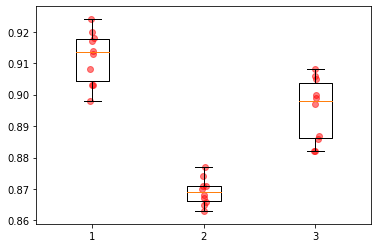

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.boxplot(acc)
plt.scatter(np.tile(np.array([1,2,3]),(10,1))+0.01*np.random.normal(size=(10,3)),acc,alpha = 0.5,color='r')

<div class = "alert alert-info" style = "border-radius:10px" ><b>QUIZ:</b > What is the best of the three methods?</div>

<div class = "alert alert-info" style = "border-radius:10px"><b>QUIZ:</b> What is the expected accuracy of the selected method in exploitation over unseen data? </div>

<div class="alert alert-danger" style = "border-radius:10px"><b>EXERCISE:</b> The  `breast_cancer` dataset from `datasets` (check `load_breast_cancer`) reports a set of clinical trials with the outcome of breast cancer detection. We want to build a method to predict whether a patient has a potential cancer or not according to her clinical trials.

<p>

For that purpose we will use two different models, a support vector machine and a gradient boosting machine. We will train different settings of a support vector machine (`svm.SVC`) and a single gradient boosting machine (`ensemble.GradientBoostingMachine`) with the following parameters:

<ul>
<li>
`svm.SVC(C=10.0,gamma = 1e-5,random_state=42)`
</li>
<li>
`svm.SVC(C=100.0,gamma = 1e-5,random_state=42)`
</li>
<li>
`svm.SVC(C=1000.0,gamma = 1e-6,random_state=42)`
</li>
<li>
`ensemble.GradientBoostingClassifier(random_state=42)`
</li>
</ul>
<p>
For selection purposes and accuracy evaluation we will use `model_selection.train_test_split`.
The data set will be divided using parameters `test_size = 100` and `random_state=42`. As a result of this first division we will have a big training set and a 100 samples test set. Following that and using the same settings we will divide the remaining training set into the final training set and the validation set with 100 samples again.

    
<p>
    DO NOT PREPROCESS OR NORMALIZE DATA!
<p>

Prepare the following answers:

<ol>
<li>
Check the sizes of the training, validation and test sets.
</li>
<li>
Report the training accuracy of all four methods.
</li>
<li>
Report the validation accuracy for all methods.
</li>
<li>
Report the performance of all methods using the test set.
</li>
</ol>

<p>
In the light of the answers obtained from the exercise:
<ul>
<li>
Question 1: What is the size of the training set? 
</li>
<li>
Question 2: What method do you select?
</li>
<li>
Question 3: What is the expected performance of the method selected?
</li>
</ul>

</div>

In [81]:
import pandas as pd

In [73]:
#Your code
cancer= datasets.load_breast_cancer()

In [74]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [75]:

df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [77]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
y = df_cancer['target']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 100, random_state = 42)

In [82]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (469, 30)


The size of our testing "X" (input features) is (100, 30)


The size of our training "y" (output feature) is (469,)


The size of our testing "y" (output features) is (100,)


In [103]:
from sklearn.svm import SVC
from sklearn import ensemble
models = [SVC(C=10.0,gamma = 1e-5,random_state=42),SVC(C=100.0,gamma = 1e-5,random_state=42),SVC(C=1000.0,gamma = 1e-6,random_state=42), ensemble.GradientBoostingClassifier(random_state=42)]

In [123]:
for i in models:
    i.fit(X_train, y_train)
    y_predict = i.predict(X_test)
    print(metrics.accuracy_score(y_test,y_predict))
    print(classification_report(y_test, y_predict))
    

0.96
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        37
         1.0       0.94      1.00      0.97        63

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

0.96
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        37
         1.0       0.94      1.00      0.97        63

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

0.96
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        37
         1.0       0.94      1.00      0.97        63

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

0.96

In [117]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                     columns=['predicted_cancer','predicted_healthy'])
print(confusion)

            predicted_cancer  predicted_healthy
is_cancer                 62                  1
is_healthy                 3                 34


In [100]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,63,0
is_healthy,4,33


In [125]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=100, random_state=42) # 0.25 x 0.8 = 0.2


In [128]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (369, 30)


The size of our testing "X" (input features) is (100, 30)


The size of our training "y" (output feature) is (369,)


The size of our testing "y" (output features) is (100,)


In [131]:
for i in models:
    i.fit(X_train, y_train)
    y_predict = i.predict(X_val)
    print(metrics.accuracy_score(y_val,y_predict))
    print(classification_report(y_val, y_predict))

0.96
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        35
         1.0       0.94      1.00      0.97        65

    accuracy                           0.96       100
   macro avg       0.97      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100

0.98
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        35
         1.0       0.97      1.00      0.98        65

    accuracy                           0.98       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        35
         1.0       1.00      1.00      1.00        65

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

0.99
